In [160]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
df = pd.read_csv("Bengaluru_House_Data.csv")
df


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [161]:
df.describe()


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# **`Feature Engineering`**

In [162]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [163]:
df = df.replace({"Super built-up  Area":3,"Built-up  Area":2,"Carpet  Area":1,"Plot  Area":0})

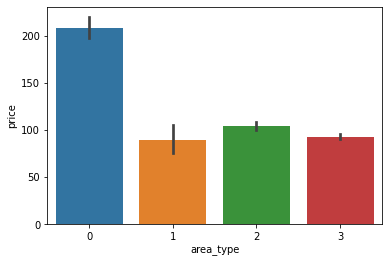

In [164]:
import seaborn as sns
sns.barplot(x=df.area_type,y=df.price)

In [165]:
#there are 10k values as read to move it might be a bias in splitting so better to remove
df.availability.value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Jan               1
15-Jun               1
16-Oct               1
17-Jan               1
14-Nov               1
Name: availability, Length: 81, dtype: int64

In [166]:
df =df.drop(['society','availability'],axis='columns')
df

,area_type,location,size,total_sqft,bath,balcony,price
0,3,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,0,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,3,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,2,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,3,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,2,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,3,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [167]:
df['balcony']=df['balcony'].fillna(df['balcony'].mode())
df

,area_type,location,size,total_sqft,bath,balcony,price
0,3,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,0,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,3,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,2,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,3,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,2,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,3,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [168]:
df=df.dropna()
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [169]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,3,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,0,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,3,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [170]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.bhk.unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [171]:
df.balcony.value_counts()

2.0    5112
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [172]:
df.total_sqft.notnull()

0        True
1        True
2        True
3        True
4        True
         ... 
13314    True
13315    True
13317    True
13318    True
13319    True
Name: total_sqft, Length: 12710, dtype: bool

This function will average the given range.

In [173]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)
df = df[df.total_sqft.notnull()]
df.head(2)


,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,3,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,0,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4


Adding new column price_per_sqft

In [174]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,3,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,0,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,3,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


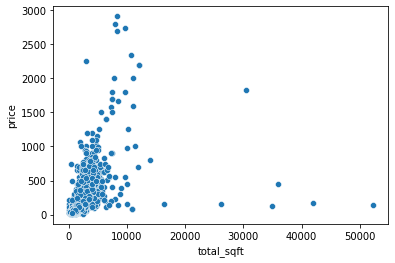

In [175]:
df
sns.scatterplot(x=df.total_sqft,y=df.price)

In [176]:
df2 = df[df['bath'] < 6]

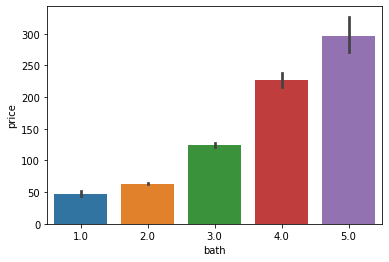

In [177]:
df2.bath.value_counts()
sns.barplot(x=df2.bath,y=df2.price)

In [178]:
df3 = df2.sample(n=20)
df3

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9466,3,Hormavu,2 BHK,1165.0,2.0,1.0,40.00,2,3433.476395
5483,2,Hebbal,4 BHK,3895.0,2.0,1.0,451.00,4,11578.947368
8631,3,Abbigere,3 BHK,1326.0,2.0,1.0,35.00,3,2639.517345
1559,2,Manjunatha Layout,2 BHK,1300.0,2.0,1.0,60.00,2,4615.384615
10103,3,Talaghattapura,2 BHK,921.0,2.0,2.0,29.47,2,3199.782845
7015,3,Hebbal,3 BHK,1645.0,3.0,2.0,117.00,3,7112.462006
3485,3,Devanahalli,2 BHK,1080.0,2.0,1.0,44.00,2,4074.074074
11522,3,Sarjapur Road,3 BHK,1505.0,2.0,2.0,60.00,3,3986.710963
6792,3,Electronics City Phase 1,2 BHK,1200.0,2.0,2.0,59.76,2,4980.000000
6097,3,Rajaji Nagar,4 BHK,3526.0,4.0,3.0,598.00,4,16959.727737


In [179]:
df3=df3.drop(['size'],axis='columns')
df3 = df3[['location','total_sqft','bhk','balcony','price_per_sqft','bath','price']]
df3

,location,total_sqft,bhk,balcony,price_per_sqft,bath,price
9466,Hormavu,1165.0,2,1.0,3433.476395,2.0,40.00
5483,Hebbal,3895.0,4,1.0,11578.947368,2.0,451.00
8631,Abbigere,1326.0,3,1.0,2639.517345,2.0,35.00
1559,Manjunatha Layout,1300.0,2,1.0,4615.384615,2.0,60.00
10103,Talaghattapura,921.0,2,2.0,3199.782845,2.0,29.47
7015,Hebbal,1645.0,3,2.0,7112.462006,3.0,117.00
3485,Devanahalli,1080.0,2,1.0,4074.074074,2.0,44.00
11522,Sarjapur Road,1505.0,3,2.0,3986.710963,2.0,60.00
6792,Electronics City Phase 1,1200.0,2,2.0,4980.000000,2.0,59.76
6097,Rajaji Nagar,3526.0,4,3.0,16959.727737,4.0,598.00


In [180]:
dummies = pd.get_dummies(df3.location)
dummies.head(3)

,Abbigere,Amblipura,Babusapalaya,Bannerghatta Road,Begur Road,Devanahalli,Dodda Nekkundi,Electronics City Phase 1,Gollahalli,Hebbal,Hormavu,Jigani,Kanakpura Road,Kuvempu Nagar,Manjunatha Layout,Mico Layout,Rajaji Nagar,Sarjapur Road,Talaghattapura
9466,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5483,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8631,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [181]:
df4 = pd.concat([df3,dummies],axis='columns')
df4.head() 


,location,total_sqft,bhk,balcony,price_per_sqft,bath,price,Abbigere,Amblipura,Babusapalaya,Bannerghatta Road,Begur Road,Devanahalli,Dodda Nekkundi,Electronics City Phase 1,Gollahalli,Hebbal,Hormavu,Jigani,Kanakpura Road,Kuvempu Nagar,Manjunatha Layout,Mico Layout,Rajaji Nagar,Sarjapur Road,Talaghattapura
9466,Hormavu,1165.0,2,1.0,3433.476395,2.0,40.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5483,Hebbal,3895.0,4,1.0,11578.947368,2.0,451.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8631,Abbigere,1326.0,3,1.0,2639.517345,2.0,35.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1559,Manjunatha Layout,1300.0,2,1.0,4615.384615,2.0,60.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10103,Talaghattapura,921.0,2,2.0,3199.782845,2.0,29.47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [182]:
df5 = df4.drop(['location','price','bath','balcony'],axis='columns')
df5.head()

,total_sqft,bhk,price_per_sqft,Abbigere,Amblipura,Babusapalaya,Bannerghatta Road,Begur Road,Devanahalli,Dodda Nekkundi,Electronics City Phase 1,Gollahalli,Hebbal,Hormavu,Jigani,Kanakpura Road,Kuvempu Nagar,Manjunatha Layout,Mico Layout,Rajaji Nagar,Sarjapur Road,Talaghattapura
9466,1165.0,2,3433.476395,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5483,3895.0,4,11578.947368,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8631,1326.0,3,2639.517345,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1559,1300.0,2,4615.384615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10103,921.0,2,3199.782845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# ***`Feature scaling`***

In [183]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df5[['total_sqft','price_per_sqft']]=sc.fit_transform(df5[['total_sqft','price_per_sqft']].values)

In [184]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 9466 to 9356
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_sqft                20 non-null     float64
 1   bhk                       20 non-null     int64  
 2   price_per_sqft            20 non-null     float64
 3   Abbigere                  20 non-null     uint8  
 4   Amblipura                 20 non-null     uint8  
 5   Babusapalaya              20 non-null     uint8  
 6   Bannerghatta Road         20 non-null     uint8  
 7   Begur Road                20 non-null     uint8  
 8   Devanahalli               20 non-null     uint8  
 9   Dodda Nekkundi            20 non-null     uint8  
 10  Electronics City Phase 1  20 non-null     uint8  
 11  Gollahalli                20 non-null     uint8  
 12  Hebbal                    20 non-null     uint8  
 13  Hormavu                   20 non-null     uint8  
 14  Jigani 

# ***`Model build`***

In [185]:
df6 = df5.values

In [186]:
x = df6

In [187]:
y=df4.values[:,6]
print(y)

[40.0 451.0 35.0 60.0 29.47 117.0 44.0 60.0 59.76 598.0 250.0 65.0 63.59
 45.0 65.0 71.0 165.0 56.0 59.0 36.37]


                total_sqft       bhk  price_per_sqft
total_sqft        1.000000  0.577758        0.633600
bhk               0.577758  1.000000        0.749233
price_per_sqft    0.633600  0.749233        1.000000


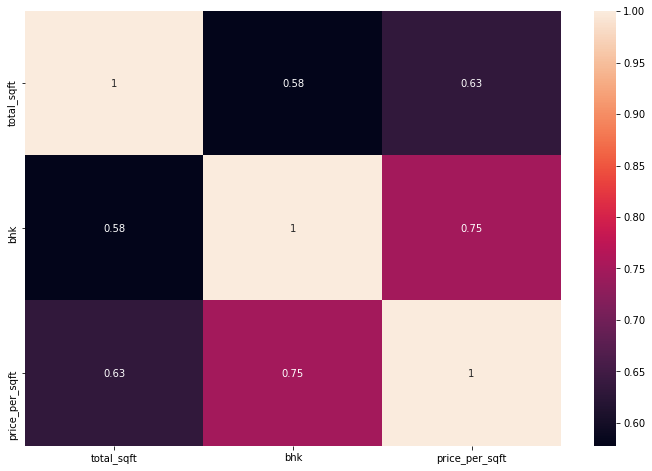

In [188]:
import matplotlib.pyplot as plt
print(df5.iloc[:,0:3].corr())  
plt.figure(figsize=(12,8))
dataplot = sns.heatmap(df5.iloc[:,0:3].corr(),annot=True) 
# displaying heatmap 
plt.show()

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
X_train
X_test

array([[ 0.08000703,  3.        , -0.66115242,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 2.80612706,  4.        ,  1.39287277,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.47991965,  3.        , -0.79762334,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.49584754

In [190]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.intercept_)

173.96621788946015


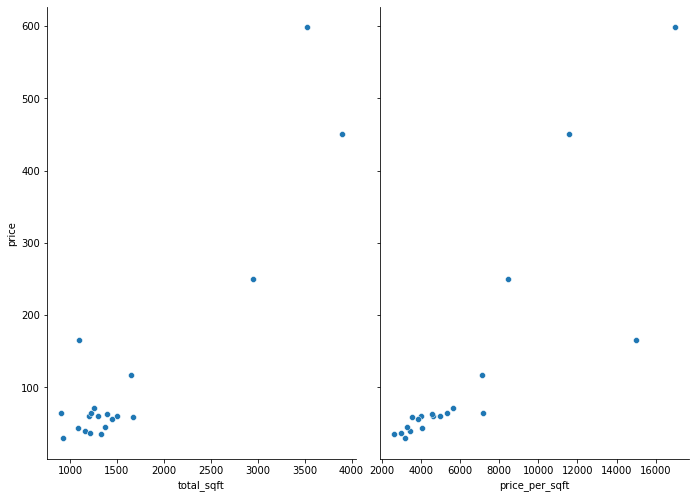

In [191]:
sns.pairplot(data=df4,x_vars=['total_sqft','price_per_sqft'], y_vars='price', size=7, aspect=0.7)

In [192]:
y_pred=lr.predict(X_test)
y_pred

array([ 73.09806564, 439.20708817,  10.95932704,  67.28086996])

In [193]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

14.705630098873968

In [194]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9913273203138347

In [195]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),X_train,y_train, cv=cv)

array([ 0.64136678,  0.3887009 , -2.66445889,  0.63481286,  0.68360879])

In [196]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
clf.fit(X_train, y_train)
y_ridge_predict = clf.predict(X_test)

In [197]:
metrics.r2_score(y_test,y_ridge_predict)

0.991331919968303

In [198]:
mean_absolute_error(y_test, y_ridge_predict)

14.70242655288705

In [202]:
y_ridge_predict

array([ 73.10390215, 439.21041408,  10.97071418,  67.27693231])